# **Airbnb Price Prediction and Neighborhood Insights using Python**

**An end-to-end data science and analytics project to explore, visualize, and model Airbnb listings with a focus on pricing trends, host behavior, and predictive modeling.**

**Importing Libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",100)
pd.set_option("display.width",1000)

In [3]:
data_clean = pd.read_csv("/content/geneva_airbnb_cleaned.csv")

Getting the cleaned file for further analysis.

In [4]:
data_clean.shape

(1969, 67)

In [5]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1969 non-null   int64  
 1   listing_url                                   1969 non-null   object 
 2   last_scraped                                  1969 non-null   object 
 3   source                                        1969 non-null   object 
 4   name                                          1969 non-null   object 
 5   description                                   1969 non-null   object 
 6   picture_url                                   1969 non-null   object 
 7   host_id                                       1969 non-null   int64  
 8   host_url                                      1969 non-null   object 
 9   host_since                                    1969 non-null   o

Therefore we got 1969 rows and 67 columns without any null values.

# **Data visualization**

**Univariate analysis:**

Univariate analysis is a type of statistical analysis that examines a single variable at a time. It focuses on describing and summarizing the characteristics of that variable without considering relationships with other variables.It is useful for understanding the distribution and central tendencies of a single variable.

The following columns are considered: Price distribution, room types, superhost status, review scores

**Price distribution:**

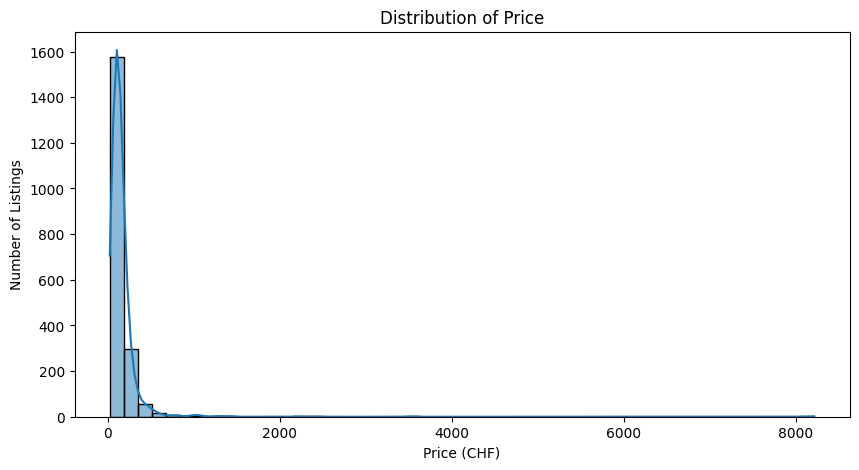

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(data_clean['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (CHF)')
plt.ylabel('Number of Listings')
plt.show()

From the above plot,the distribution is right skewed i.e most listings are at low prices.
There are a few listings with very high prices (outliers are present).
The majority of prices fall under 500 CHF, with a strong peak under 200 CHF.



We can remove those outliers by filtering the listings above 1000 CHF. Less skew distribution gives better model.

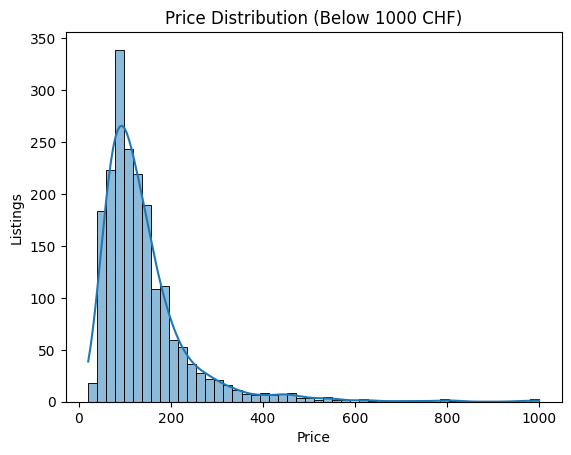

In [7]:
filtered_data = data_clean[data_clean['price'] <= 1000]
sns.histplot(filtered_data['price'], bins=50, kde=True)
plt.title('Price Distribution (Below 1000 CHF)')
plt.xlabel('Price')
plt.ylabel('Listings')
plt.show()


This plot gives clear distribution its still right skewed.Most listings are between 80–160 CHF, witha peak near 100 CHF.Few listings are above 400 CHF.

**Room type:**

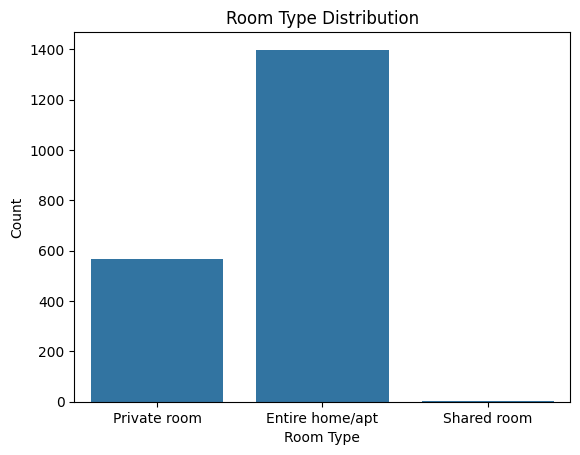

In [8]:
sns.countplot(data=data_clean, x='room_type')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


There are three room type 1.private room 2.Entire home/apartment type 3.shared room. Most listings are with entire home[70%,dominant] 2.private room[25%] and the least one is shared room[almost 1%].

**Superhost status:**

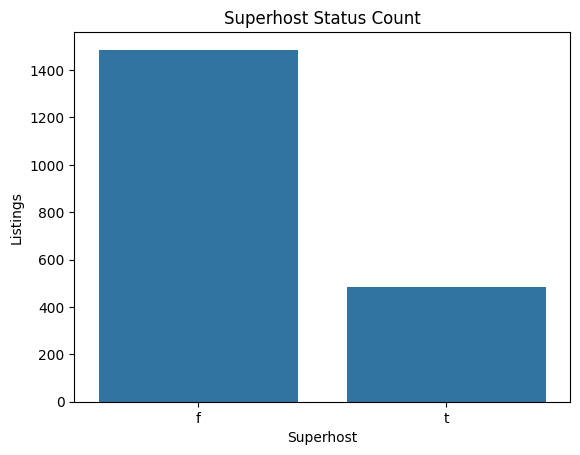

In [9]:
sns.countplot(data=data_clean, x='host_is_superhost')
plt.title('Superhost Status Count')
plt.xlabel('Superhost')
plt.ylabel('Listings')
plt.show()


The insights are 75% are not superhost and 25% are superhost.Being a Superhost is relatively rare in Geneva Airbnb data.

**Review scores:**
There are columns like review_scores_rating                       review_scores_accuracy                       
review_scores_cleanliness                     
review_scores_checkin                        
review_scores_communication                   
review_scores_location                       
review_scores_value.

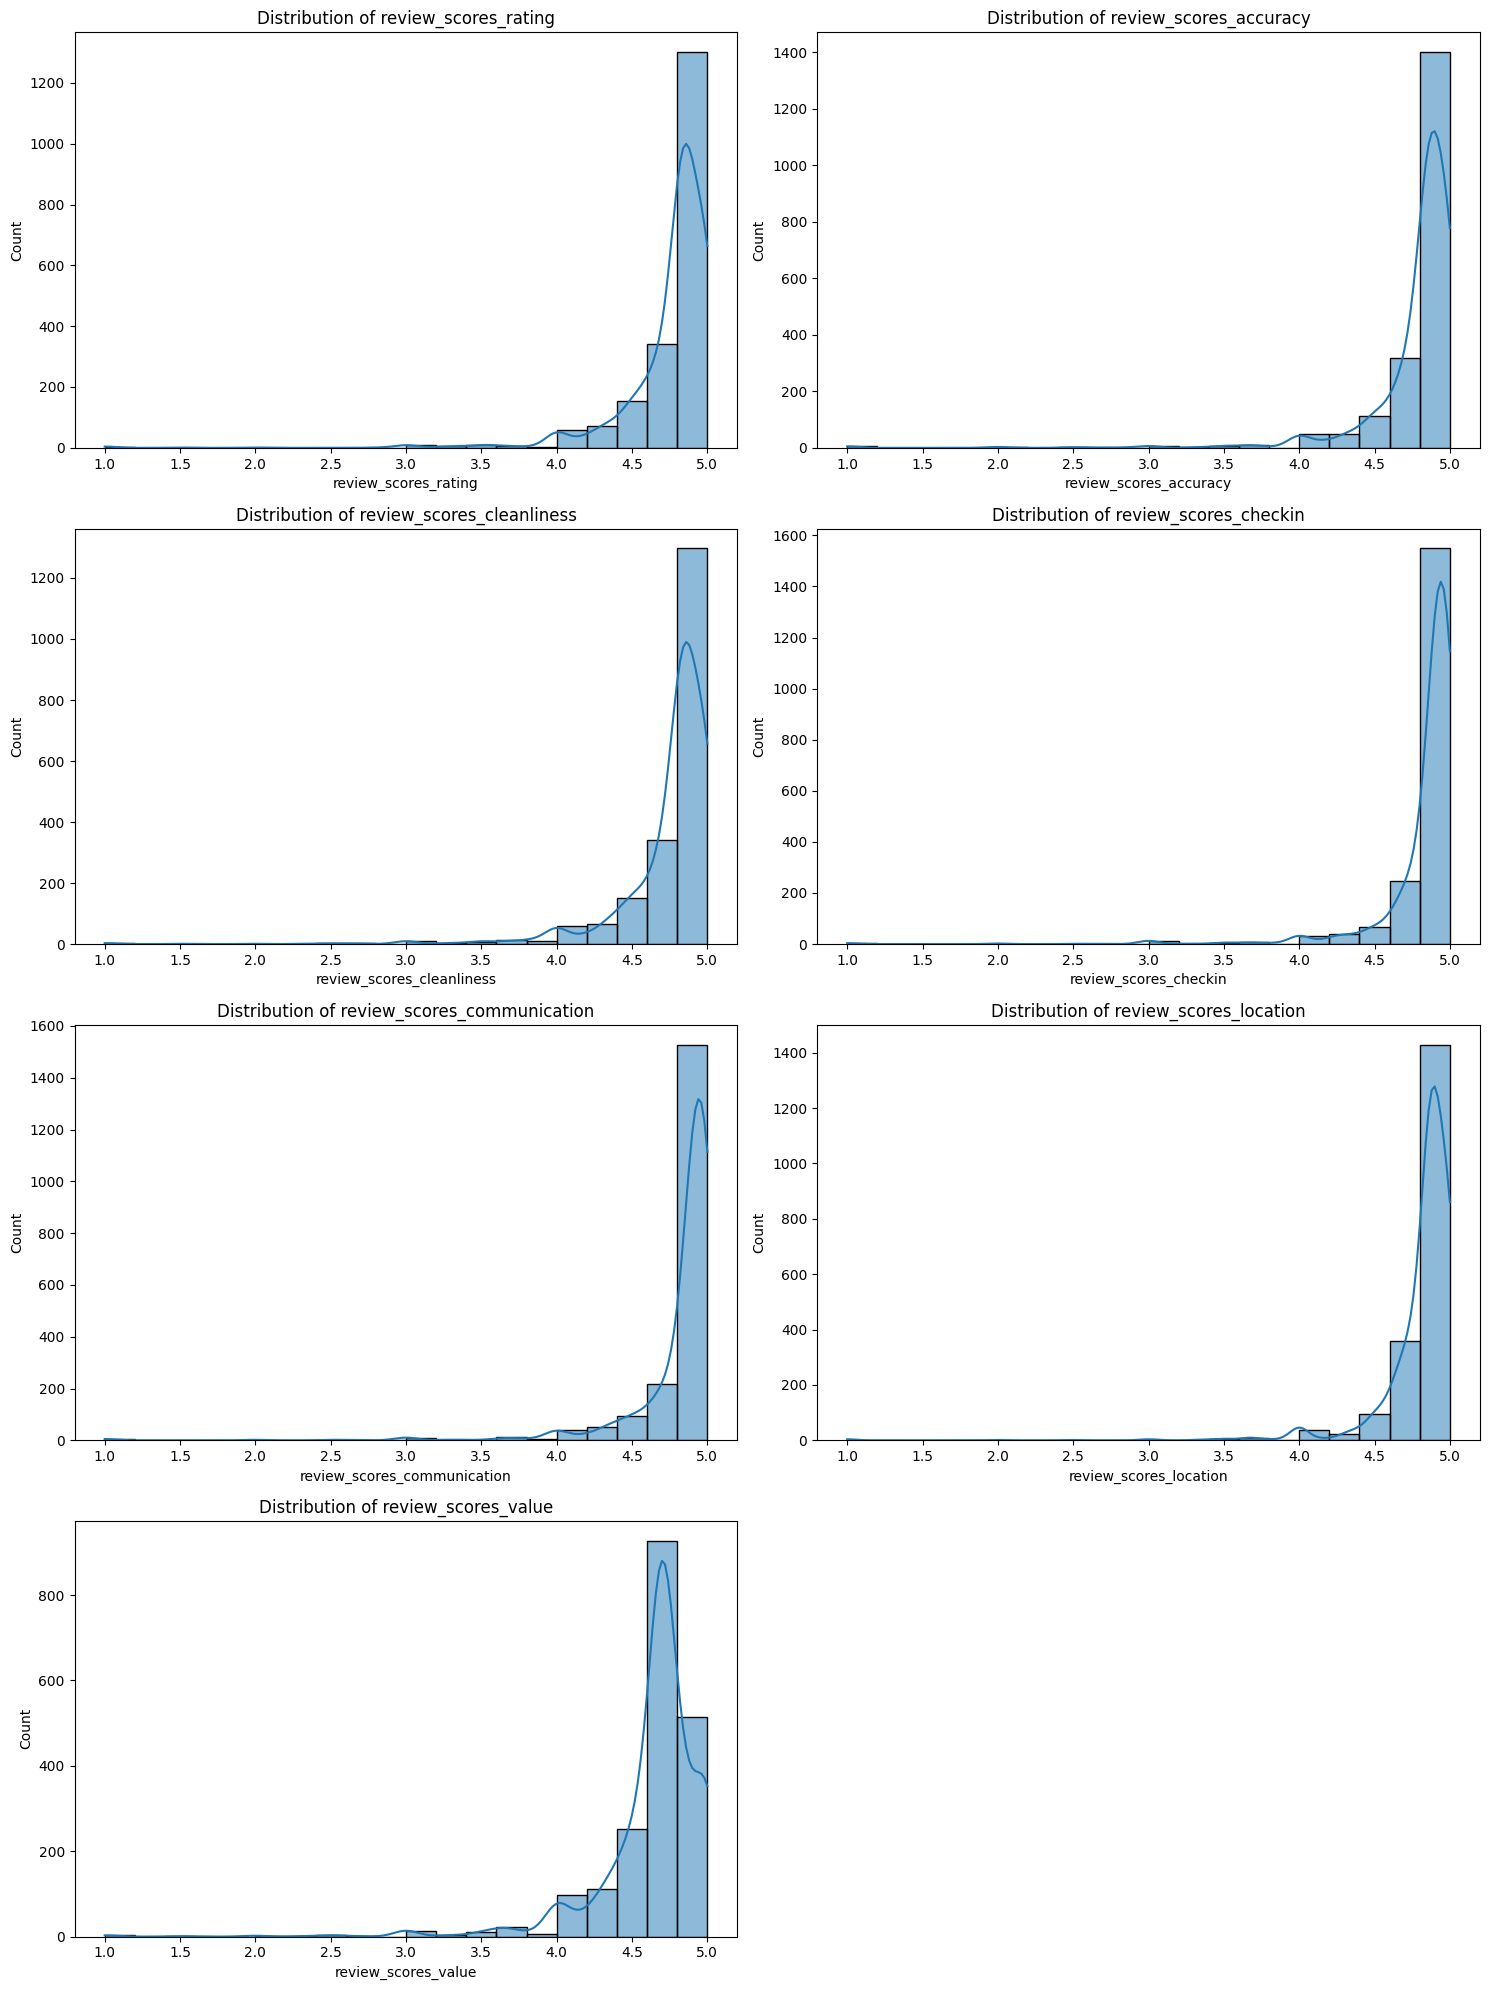

In [10]:
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(review_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(data_clean[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


The above plots indicates review_scores_rating shows most listings are highly rated.     
review_scores_accuracy peaks at ~4.9–5 i.e	Hosts are mostly accurate in their descriptions.    
review_scores_cleanliness scores vary slightly.   
review_scores_checkin	peak at 5	says check-in process is very smooth.    review_scores_communication peaks at 5	shows hosts are very responsive.

**Bivariate analysis:**

It is a statistical method used to analyze the relationship between exactly two variables. It helps in understanding how changes in one variable might be associated with changes in another. This analysis is crucial for identifying patterns, correlations, and potential dependencies between paired data sets.

Here price distribution is analysed with some of the important categorical columns

**Price vs room_type**

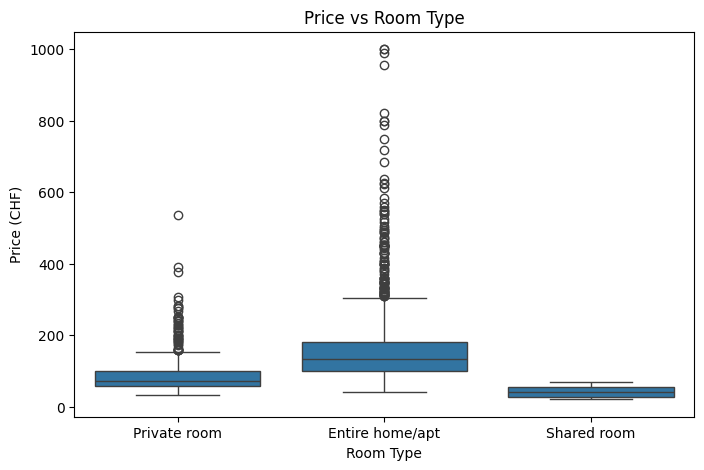

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='room_type', y='price', data=filtered_data)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (CHF)')
plt.show()


Entire home/apt	spread Wide	clearly more expensive, premium stay option.
Private room	spread moderate	For budget travelers.
Shared room	spread tight	very few listings, budget stays only[student-friendly or hostel type].


**price vs superhost status:**

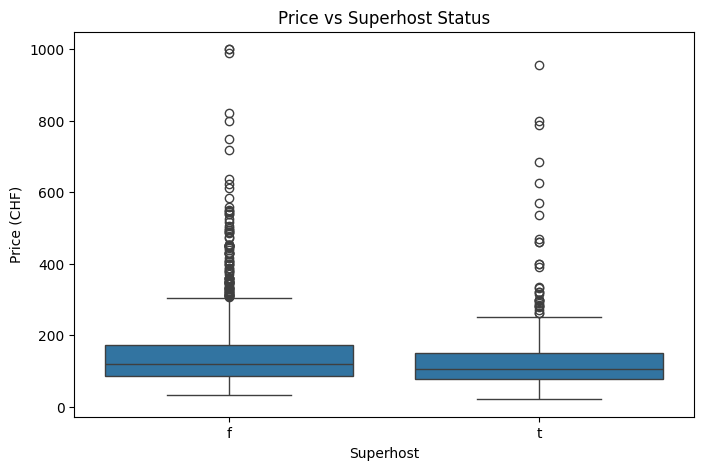

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='host_is_superhost', y='price', data=filtered_data)
plt.title('Price vs Superhost Status')
plt.xlabel('Superhost')
plt.ylabel('Price (CHF)')
plt.show()


Superhosts aren’t always charging more — their value may be in reliability,not luxury.Most listings are not superhosts, so the higher spread is expected.

**Instant bookable vs price:**

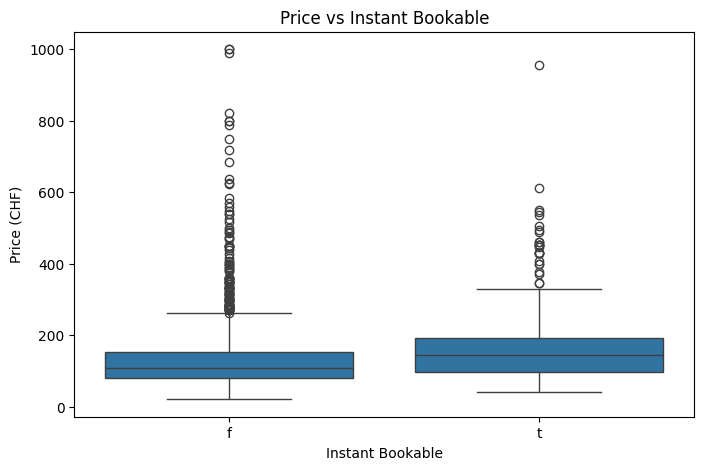

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='instant_bookable', y='price', data=filtered_data)
plt.title('Price vs Instant Bookable')
plt.xlabel('Instant Bookable')
plt.ylabel('Price (CHF)')
plt.show()


Instant bookings may charge a convenience premium.

**Price vs Neighbourhood:**

Analysing the price across different neighbourhood in Geneva.There are too many categories.Filtering top most or frequent ones gives the plot clean and meaningful.

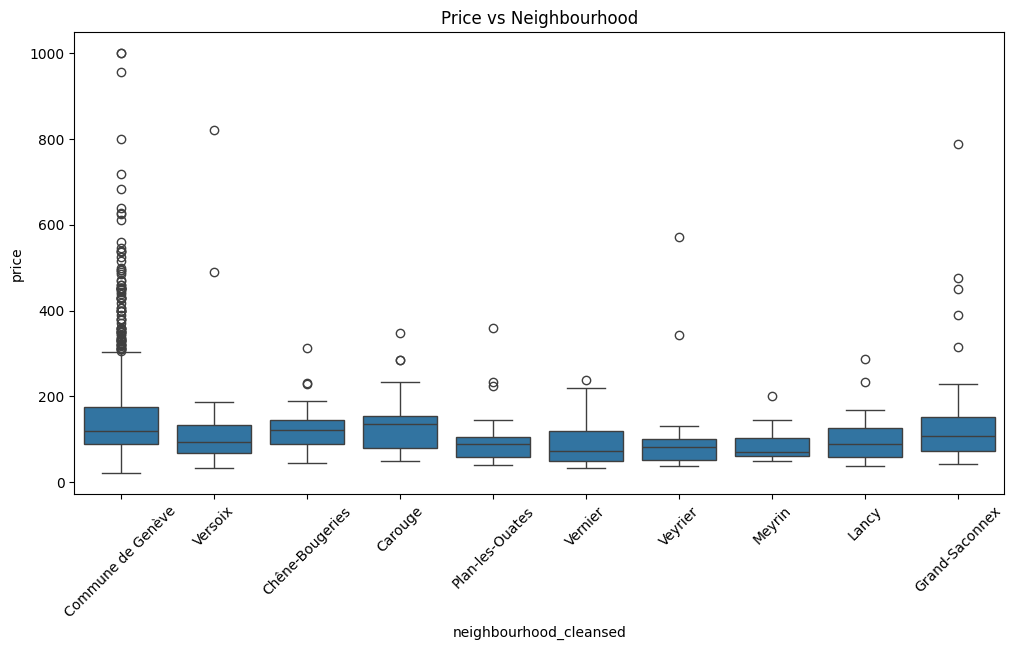

In [14]:
top_neigh = filtered_data['neighbourhood_cleansed'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price',
            data=filtered_data[filtered_data['neighbourhood_cleansed'].isin(top_neigh)])
plt.title('Price vs Neighbourhood')
plt.xticks(rotation=45)
plt.show()


Commune de Genève	 has highest median spread likely city center has high demand, wide price range.
Versoix, Carouge, etc. has mid-range median spread shows more stable pricing.
Meyrin, Veyrier has lower median spread possibly suburban, budget-friendly.

**Price vs property type:**

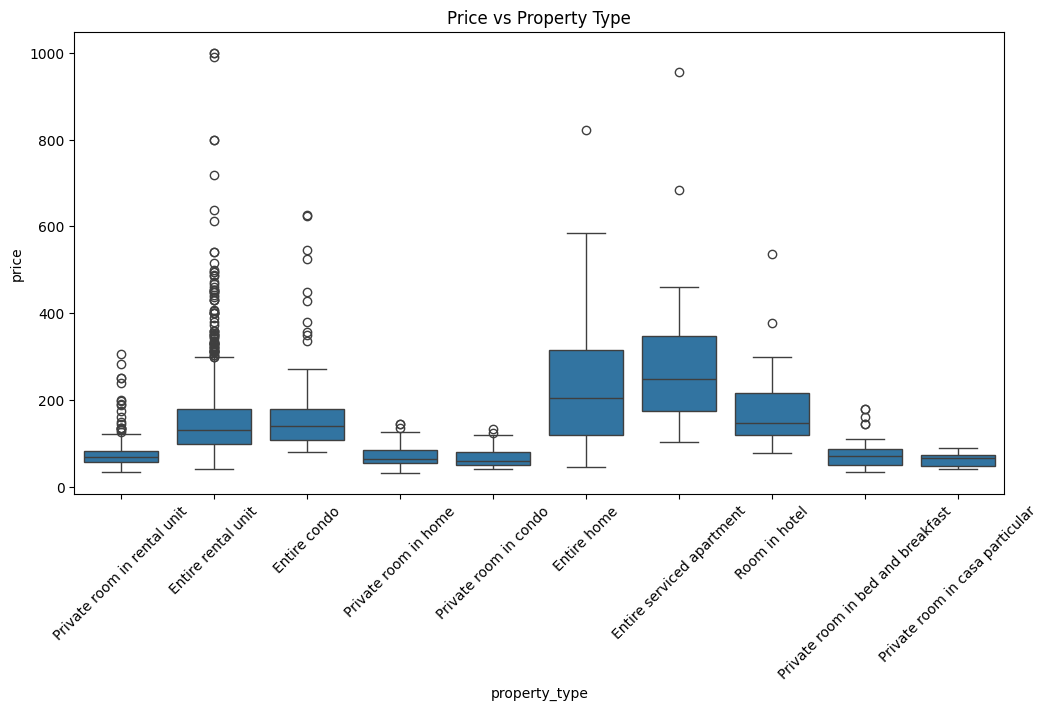

In [15]:
top_props = filtered_data['property_type'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price',
            data=filtered_data[filtered_data['property_type'].isin(top_props)])
plt.title('Price vs Property Type')
plt.xticks(rotation=45)
plt.show()


Insights are
Entire home/apt has high median spread shows most premium offering — ideal for families/tourists.   
Entire serviced apartment	high to moderate median spread shows often business-class, long-term stays.  
Private room in rental unit / casa particular	has very low median spread shows Budget-friendly, minimal amenities — ideal for solo or short-term.   
Entire rental unit, condo, hotel room	has moderate	median spread i.e Mid-tier category — strikes a balance between cost & privacy.

**Multi Variate Analysis:**

It is a set of statistical methods used to analyze data sets with multiple variables simultaneously. It helps to understand the relationships and patterns among these variables, and is crucial in fields where complex interactions between variables are present.

Here,three plots are considered  
1.**Correlation Heatmap** to see which numeric features are correlated with price.

2.**Pairplot** use with: price, review_scores_rating, accommodates, number_of_reviews, beds, etc.

3.**Boxplot with hue:**

room_type vs price (hue = instant_bookable)

property_type vs price (hue = host_is_superhost)

**1.Correlation heatmap:**

Getting only numeric columns for correlation heat map.

In [23]:
numeric_cols = data_clean.select_dtypes(include=['float64', 'int64'])


In [24]:
correlation_matrix = numeric_cols.corr()


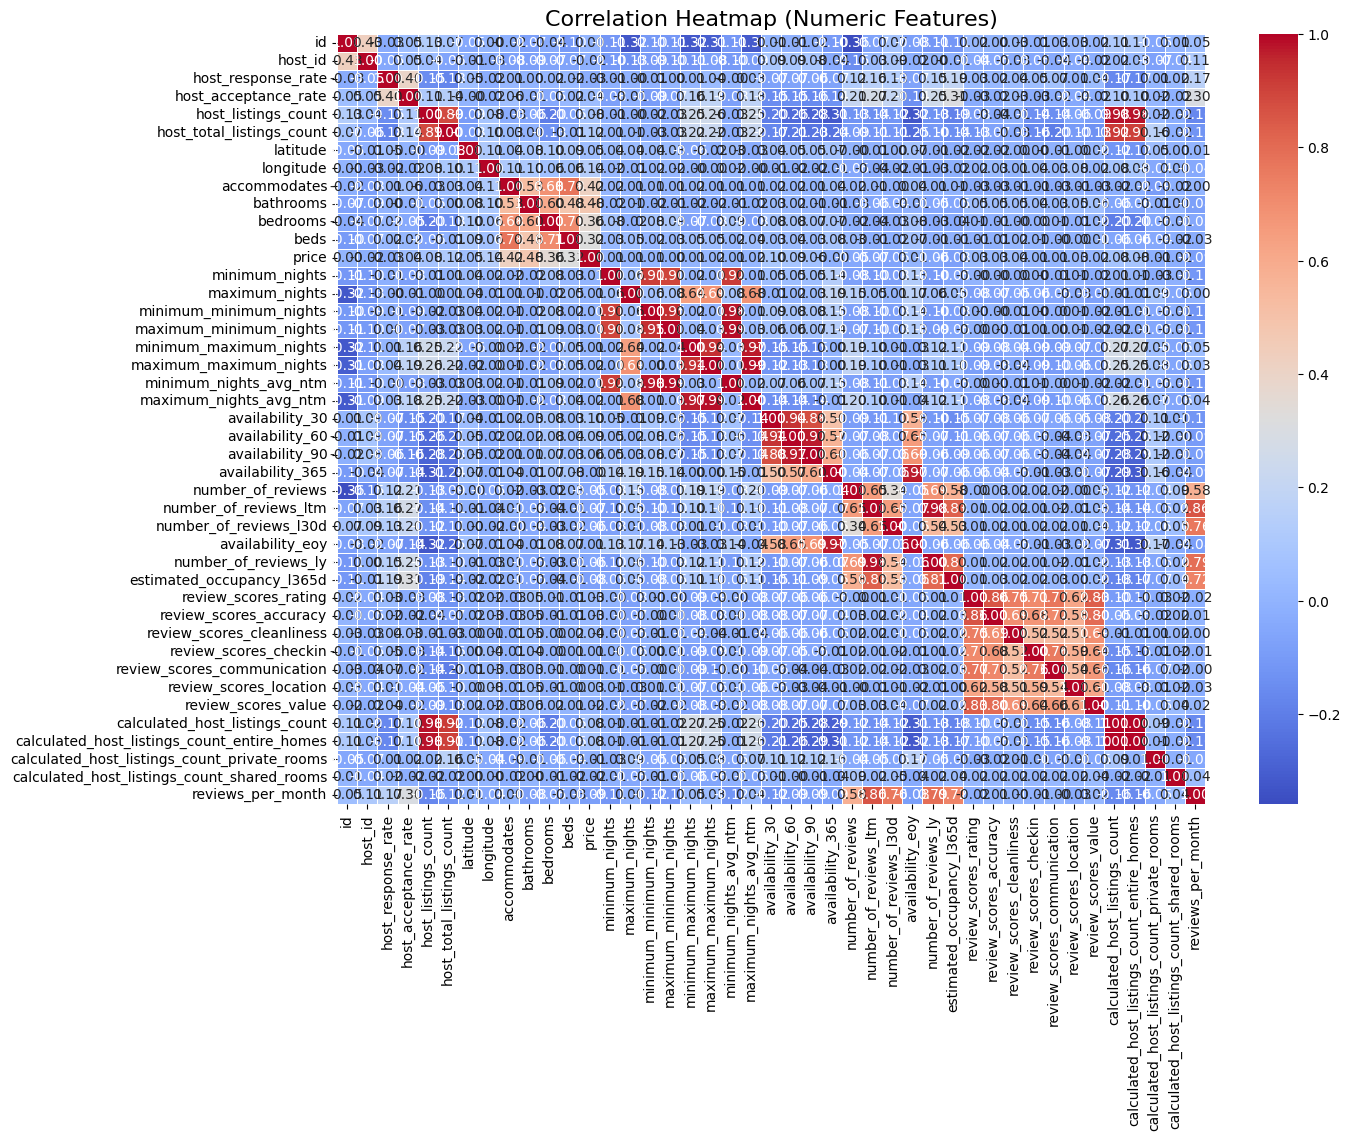

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)', fontsize=16)
plt.show()


Instead of all variables,considering only the correlation of each feature with price,sorted by strength.

In [20]:
# Compute correlations with price
corr_with_price = numeric_cols.corr()['price'].drop('price')  # Drop self-correlation

In [21]:
# Sort by absolute correlation
corr_sorted = corr_with_price.abs().sort_values(ascending=False)

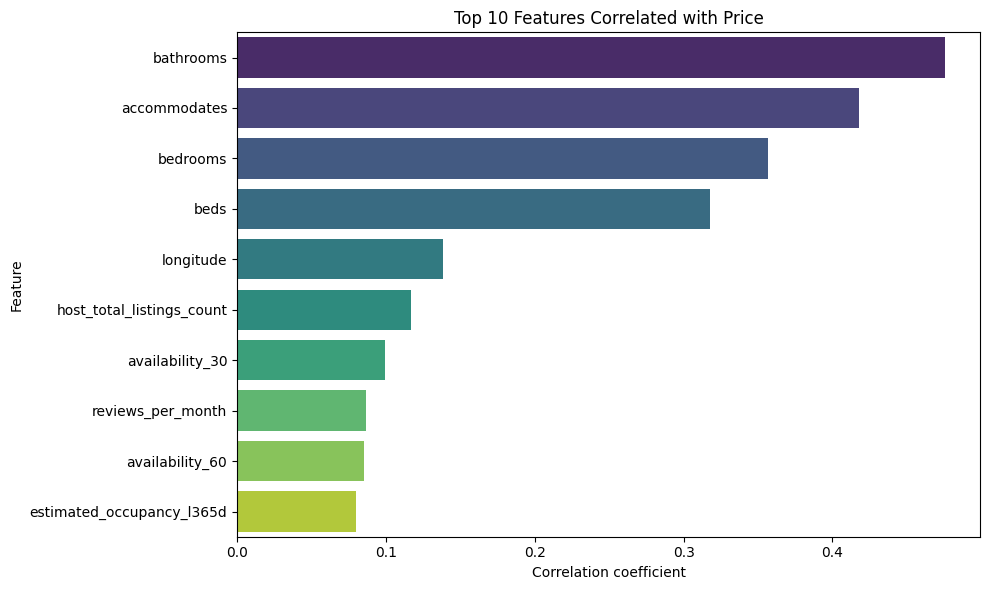

In [22]:
# Plot top 10 correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sorted.values[:10], y=corr_sorted.index[:10], palette='viridis')
plt.title('Top 10 Features Correlated with Price')
plt.xlabel('Correlation coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



space-related features like bathroom, beds, accommodatesare the strongest price predictors.     
Location(longitude) and availability offer indirect pricing signals.  
Host activity & demand signals (reviews, occupancy) also correlate, though not as strong.



**pairplot:** considering the features that seems impact on price are taken.

In [28]:
# Keep only rows where price <= 1000 in the cleaned dataset
data_clean = data_clean[data_clean['price'] <= 1000].reset_index(drop=True)


In [31]:
data_clean.to_csv("geneva_airbnb_filtered.csv", index=False)


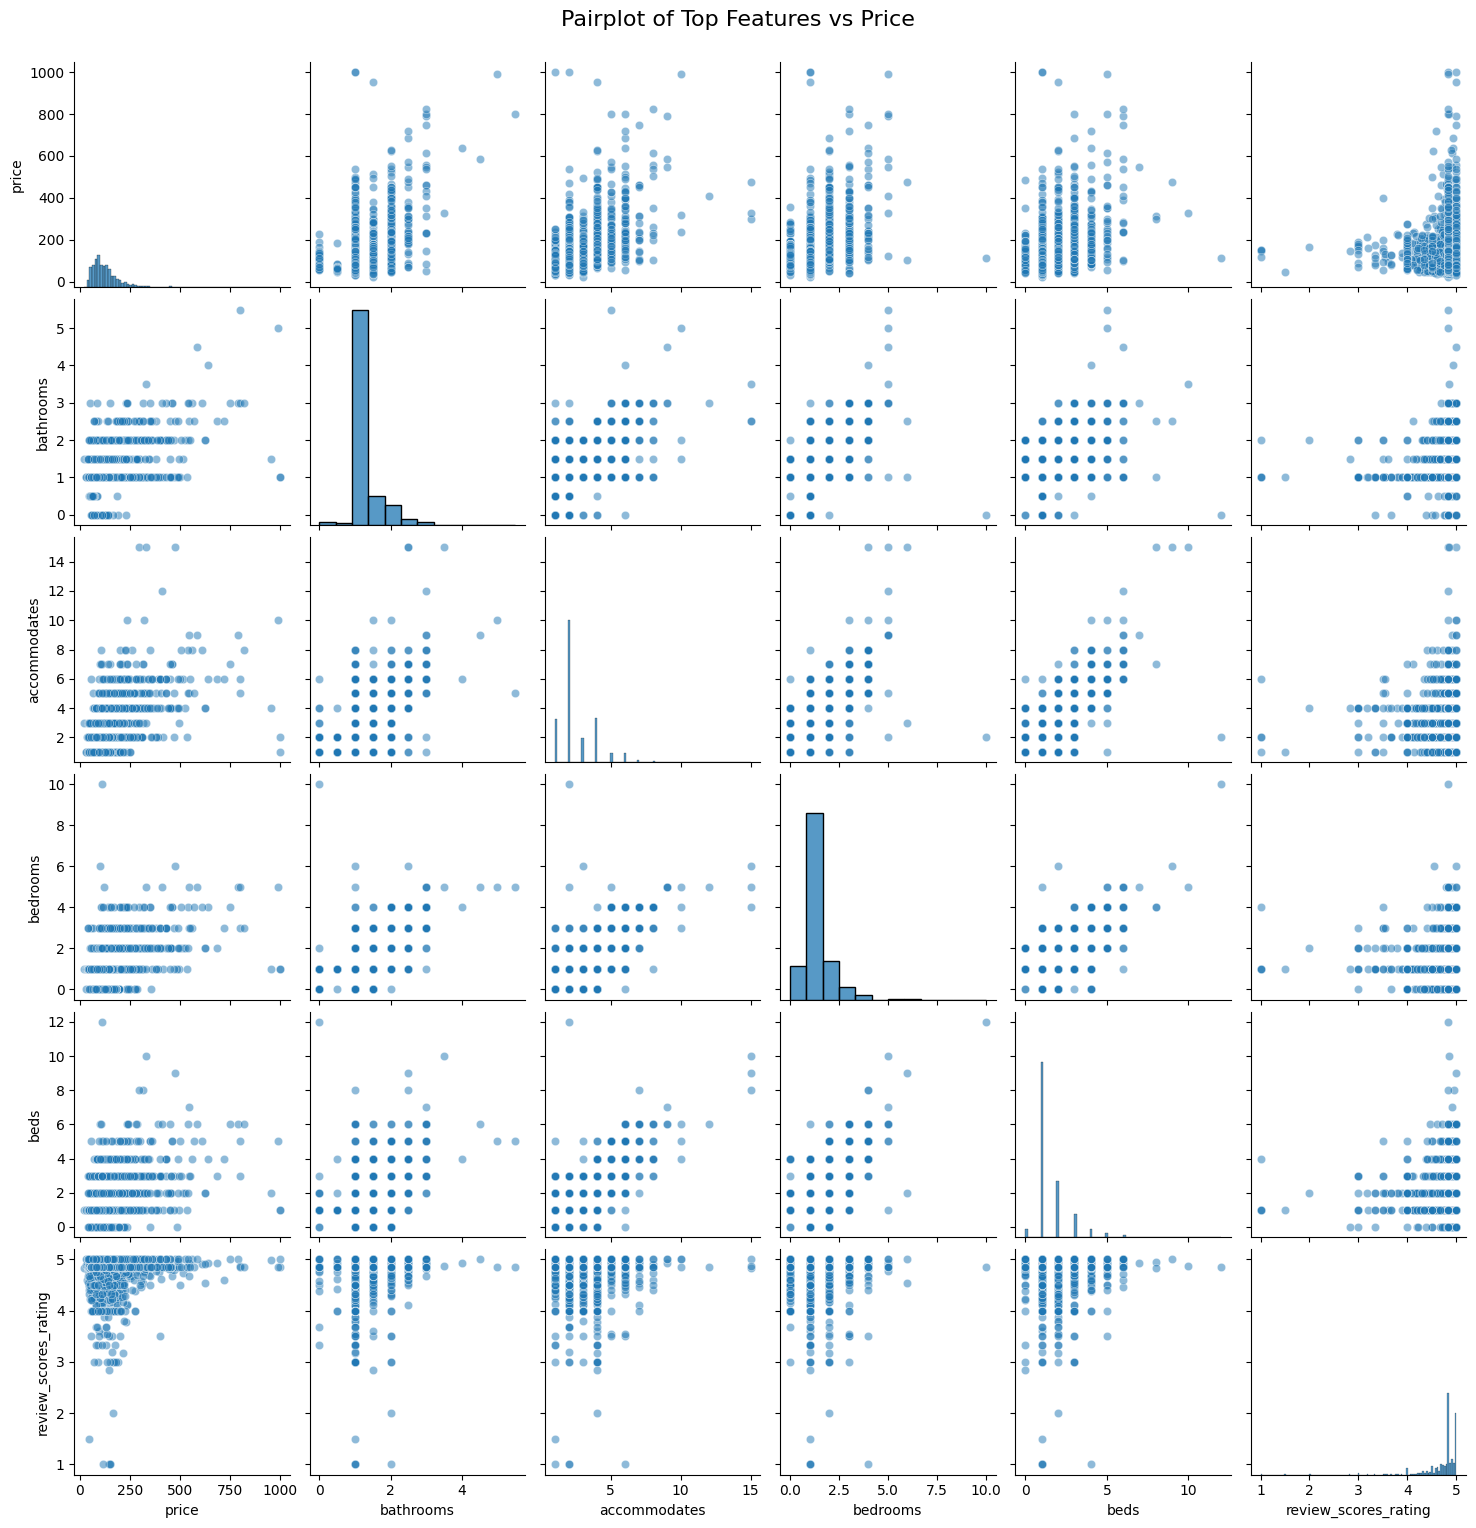

In [29]:
# Select top variables including target
pairplot_cols = ['price', 'bathrooms', 'accommodates', 'bedrooms', 'beds', 'review_scores_rating']

# Plot
sns.pairplot(data_clean[pairplot_cols], plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Top Features vs Price", y=1.02, fontsize=16)
plt.show()


Positive relationships between price and variables like bathrooms, accommodates, and bedrooms.     
Dense clustering in review scores (since most are close to 5).